# Trabajo Práctico 1 - Cálculo de Ranking Page

## Enunciado

### Pregunta 1 - ¿Por que la matriz A definida en (4) es equivalente a $p \ \mathbf{W} \ \mathbf{D} + e \ z^t$ ? Justificar.

Primero podemos ver que $e \cdot z^t$ tiene todas las filas iguales ya que $e$ es el vector de unos en $\mathbb{R}^n$, la matriz $A$ definida en (4) tiene dos términos, y justamente $e \cdot z^t$ es exactamente uno de ellos y no depende de $i$ (sólo de $j$ ya que debemos ver si es o no igual a 0).

Si quitamos $e \cdot z^t$, nos queda
$pW D=\begin{cases}
(p \cdot w_{ij} )/c_j &\text{si } c_j \neq 0\\
0 &\text{si } c_j = 0
\end{cases}$

Como $p ∈ (0, 1) $ podemos despejar también ese valor.

Para ver que lo que nos queda es $WD$, podemos recordar que $D$ es diagonal y cómo está multiplicando a la derecha de $W$, cada valor de la diagonal multiplicará a su $n-ésima$ columna, justamente, cada valor de la diagonal de $D$ es $1/c_j$. 

Así queda justificada la equivalencia entre ambas igualdades.

### Pregunta 2 -  ¿Cómo se garantiza existencia de la factorización $LU$? ¿ La matriz $(\mathbf{I} - p \ \mathbf{W} \ \mathbf{D})$ está bien condicionada? ¿Cómo influye el valor de $p$?

Veamos que existe una factorización LU de nuestra matriz $(\mathbf{I} - p\mathbf{W}\mathbf{D})$, es decir, que cada una de sus submatrices principales es inversible.

Podemos ver primero que cada submatriz principal de $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ tiene la misma estructura. Tomar una submatriz principal significa tomar $A(1 : k, 1 : k)$, es decir, las $k$ primeras páginas de nuestro grafo a analizar. Como la estructura de cada $(\mathbf{I} - p\mathbf{W}\mathbf{D})\;en\;(1 : k, 1 : k)$ se va a mantener en cada caso (se construyen con el mismo algoritmo), basta con probar que una matriz $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ es inversible para probar que todas son inversibles.

Para ver que $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ es inversible, usaremos la definición de matriz **estrictamente diagonal dominante** y que cumplir con esta condición **implica que la matriz es inversible**.

Una matriz es **estrictamente diagonal dominante** si y solo si para todo $i$, $1 ≤ i ≤ n$

$\sum_{1≤j≤n,j!=i}^{} |ai,j|<|ai,i|$

Tal vez esta definición no parezca conveniente ya que define la propiedad sobre las filas de la matriz. Podríamos ver que también vale sobre las columnas, pero con saber que el determinante de una matriz es igual al determinante de su traspuesta, ya nos alcanza para decir que si las columnas de nuestra matriz cumplen esta propiedad, esta será inversible.

Primero, podemos asegurar que la matriz $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ tiene unos en la diagonal ya que $(p\mathbf{W}\mathbf{D})$ tiene ceros en la diagonal porque $(\mathbf{W})$ tiene ceros en la diagonal (links de una página a si misma).

Luego, $(p\mathbf{W}\mathbf{D})$ tiene sólo valores positivos, por lo que al restarla a la identidad, automáticamente cumplirá la condición.

Por lo tanto, nuestra matriz $(\mathbf{I} - p\mathbf{W}\mathbf{D})$, (su traspuesta) cumple la definición de **estrictamente diagonal dominante** y entonces **cada submatriz principal es inversible**. Luego, nuestra matriz admite factorización $LU$.

Para analizar el condicionamiento de $(\mathbf{I} - p\mathbf{W}\mathbf{D})$ utilizaremos python y algunas librerías para mostrar como evoluciona este valor. 

In [1]:
from funciones import *
import matplotlib.pyplot as plt
import numpy as np

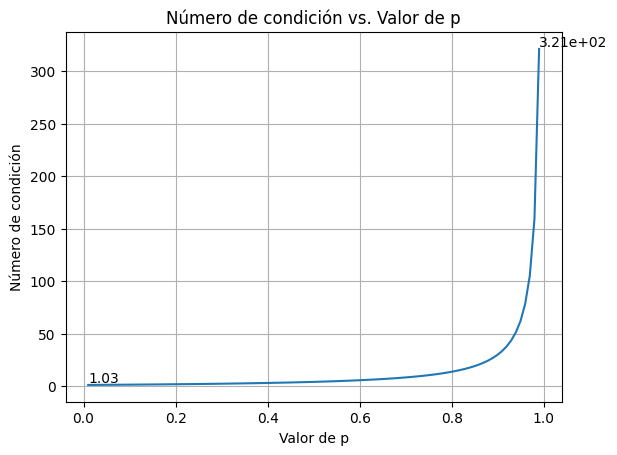

In [17]:
# Definir el rango de valores de p
p_values = np.linspace(0, 1, 100)[1:-1]

#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

#calculo D
npages = W.shape[0]
D = np.zeros((npages,npages))
for i in range(npages):
    if np.sum(W[i]) == 0:
        D[i][i] = 0
    else:
        D[i][i] = 1/np.sum(W[i])

# Calcular el número de condición para cada valor de p
cond_values = [matriz_condicion(p, W, D) for p in p_values]

# Graficar el número de condición en función de p
plt.plot(p_values, cond_values)
plt.xlabel('Valor de p')
plt.ylabel('Número de condición')
plt.title('Número de condición vs. Valor de p')
plt.grid(True)

# Add label for the first point
plt.text(p_values[0], cond_values[0], f'{cond_values[0]:.2f}', ha='left', va='bottom')
plt.text(p_values[-1], cond_values[-1], f'{cond_values[-1]:.2e}', ha='left', va='bottom')

plt.show()

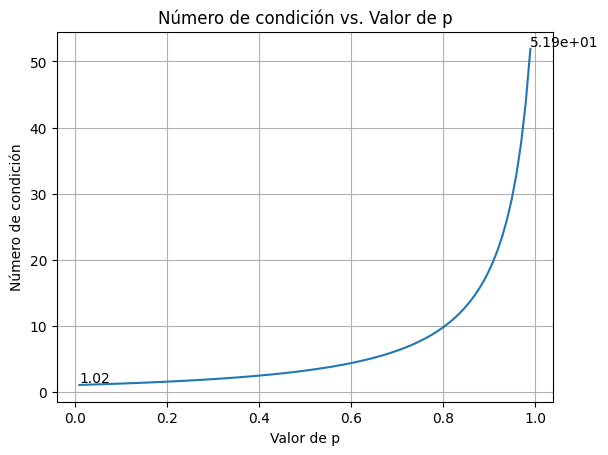

In [18]:
# Definir el rango de valores de p
p_values = np.linspace(0, 1, 100)[1:-1]

#ARCHIVOS DE ENTRADA
archivo_test = './tests/mathworld_grafo.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

#calculo D
npages = W.shape[0]
D = np.zeros((npages,npages))
for i in range(npages):
    if np.sum(W[i]) == 0:
        D[i][i] = 0
    else:
        D[i][i] = 1/np.sum(W[i])

# Calcular el número de condición para cada valor de p
cond_values = [matriz_condicion(p, W, D) for p in p_values]

# Graficar el número de condición en función de p
plt.plot(p_values, cond_values)
plt.xlabel('Valor de p')
plt.ylabel('Número de condición')
plt.title('Número de condición vs. Valor de p')
plt.grid(True)

# Add label for the first point
plt.text(p_values[0], cond_values[0], f'{cond_values[0]:.2f}', ha='left', va='bottom')
plt.text(p_values[-1], cond_values[-1], f'{cond_values[-1]:.2e}', ha='left', va='bottom')

plt.show()

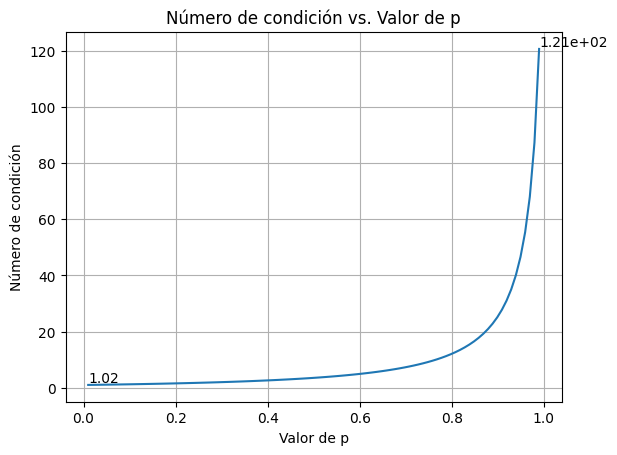

In [19]:
# Definir el rango de valores de p
p_values = np.linspace(0, 1, 100)[1:-1]

#ARCHIVOS DE ENTRADA
archivo_test = './tests/instagram_famosos_grafo.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

#calculo D
npages = W.shape[0]
D = np.zeros((npages,npages))
for i in range(npages):
    if np.sum(W[i]) == 0:
        D[i][i] = 0
    else:
        D[i][i] = 1/np.sum(W[i])

# Calcular el número de condición para cada valor de p
cond_values = [matriz_condicion(p, W, D) for p in p_values]

# Graficar el número de condición en función de p
plt.plot(p_values, cond_values)
plt.xlabel('Valor de p')
plt.ylabel('Número de condición')
plt.title('Número de condición vs. Valor de p')
plt.grid(True)

# Add label for the first point
plt.text(p_values[0], cond_values[0], f'{cond_values[0]:.2f}', ha='left', va='bottom')
plt.text(p_values[-1], cond_values[-1], f'{cond_values[-1]:.2e}', ha='left', va='bottom')

plt.show()

Podemos observar que en cada ejemplo distinto de matrices $(\mathbf{I} - p\mathbf{W}\mathbf{D})$, el resultado es el mismo: el número de condición es exponencial respecto del valor de $p$. 

Para valores de $p$ cercanos a 0, la condición de la matriz estará tan cerca como queramos del 1 y por lo tanto estará bien condicionada. Esto tiene sentido ya que si los valores son tan chicos como queramos, las normas de las matrices también lo serán. (Esto se podría entender como que para ir y volver de la transformación lineal, es decir aplicar la matriz y luego su inversa, no habría que trabajar con números muy grandes).

Con $p$ acercándose a 1, tendremos el efecto contratio, ambas normas serán muy grandes y desplazarán los valores de entrada más drásticamente, lo que no es nada bueno para la eficacia de los cálculos númericos.



---

## Implementación

Implementar la factorización $LU$ para resolver el sistema de ecuaciones (6) que permite hallar la solución buscada (es decir, el ranking de páginas). Se podrá utilizar la función **scipy.linalg.solve_triangular** para resolver sistemas triangulares.

En el siguiente cuerpo de la notebook se genera un test que va a evaluar la función que resuelve el sistema a través de un test unitario. La resolución debe realizarse en el archivo **funciones.py** que acompaña el **template-alumnos**.

### Test Unitario
En el archivo funciones.py hay que implementar la función que obtienen el ranking de las páginas.
Se espera que el llamado a la siguiente función arroje un valor esperado

**************************************************
Test unitario 1
BIEN! - Paso correctamente el test unitario
**************************************************


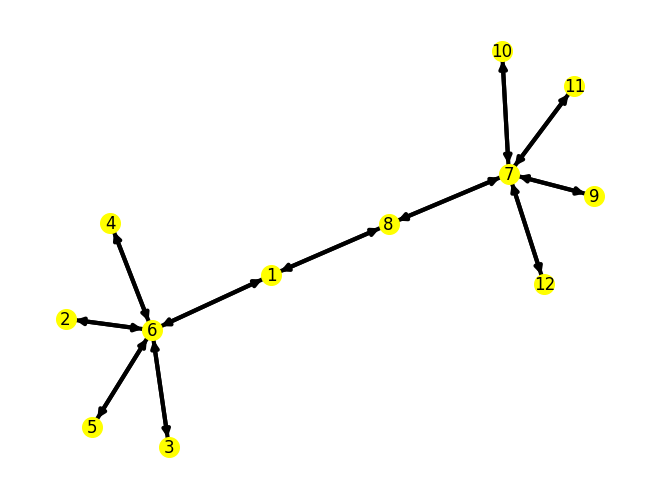

In [8]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    assert(np.isclose(obtenerMaximoRankingScore(W, p), 0.1811, atol=1e-4))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)




### Test Unitarios Adicionales

El grupo **deberá** proponer al menos 3 instancias de prueba no triviales, dos de las cuales deben ser de tipo TODOS LOS NODOS CONECTADOS, y otra de tipo NINGUNO CONECTADO. La tercera instancia queda a criterio del grupo.

Para el análisis, guiarse y responder las siguientes preguntas: 

* ¿Cómo es el ranking obtenido en cada caso de acuerdo a la estructura del grafo páginas? 
* ¿Qué conclusiones pueden sacar de la interpretación de los resultados?

Graficar los grafos usando las funciones en el **funciones.py**.

### Instancia: Todos los nodos conectados

Score máximo: 0.20000000000000007
Score mínimo: 0.2
Tiempo de ejecución: 0.001245260238647461 segundos
Cantidad de conexiones: 20.0
Cantidad de nodos: 5
Nodo con mayor score: 1
Nodo con menor score: 3


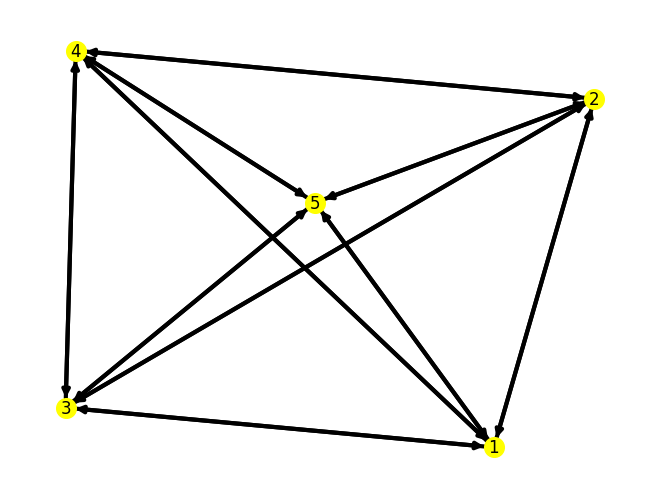

In [6]:
#ARCHIVOS DE ENTRADA
archivo_test = 'nodos_todos_con_todos.txt'
    
#ANALIZAR GRAFO
W, max_score, min_score, tiempo_ejecucion, num_connections, num_nodes, max_index, min_index = analizarGrafo(archivo_test, 0.001)
print('Score máximo:', max_score)
print('Score mínimo:', min_score)
print('Tiempo de ejecución:', tiempo_ejecucion, "segundos")
print('Cantidad de conexiones:', num_connections)
print('Cantidad de nodos:', num_nodes)
print('Nodo con mayor score:', max_index)
print('Nodo con menor score:', min_index)

dibujarGrafo(W, print_ejes=False)


Score máximo: 0.2
Score mínimo: 0.19999999999999998
Tiempo de ejecución: 0.0002758502960205078 segundos
Cantidad de conexiones: 5.0
Cantidad de nodos: 5
Nodo con mayor score: 1
Nodo con menor score: 5


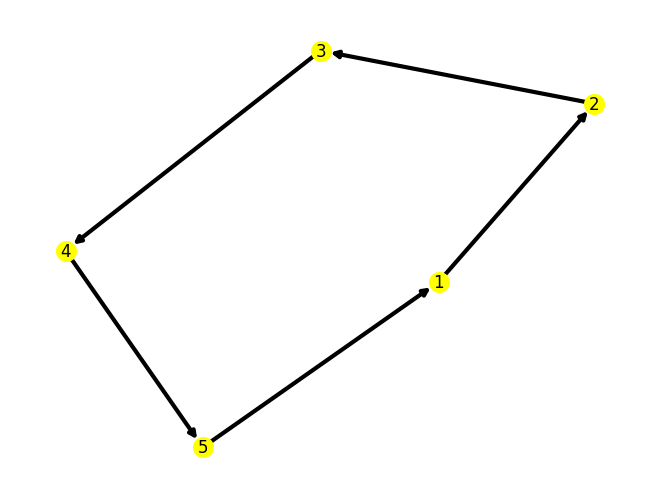

In [8]:
#ARCHIVOS DE ENTRADA
archivo_test = 'circulo.txt'
    
#ANALIZAR GRAFO
W, max_score, min_score, tiempo_ejecucion, num_connections, num_nodes, max_index, min_index = analizarGrafo(archivo_test, 0.1)
print('Score máximo:', max_score)
print('Score mínimo:', min_score)
print('Tiempo de ejecución:', tiempo_ejecucion, "segundos")
print('Cantidad de conexiones:', num_connections)
print('Cantidad de nodos:', num_nodes)
print('Nodo con mayor score:', max_index)
print('Nodo con menor score:', min_index)

dibujarGrafo(leer_archivo('circulo.txt'), print_ejes=False)

### Instancia: Ninguno conectado

Score máximo: 0.2
Score mínimo: 0.2
Tiempo de ejecución: 0.0012028217315673828 segundos
Cantidad de conexiones: 0.0
Cantidad de nodos: 5
Nodo con mayor score: 1
Nodo con menor score: 1


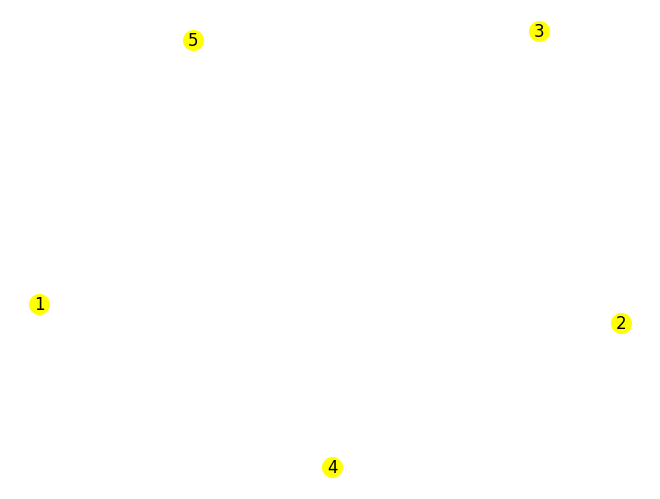

In [4]:
#ARCHIVOS DE ENTRADA
archivo_test = 'nodos_solos.txt'
    
#ANALIZAR GRAFO
W, max_score, min_score, tiempo_ejecucion, num_connections, num_nodes, max_index, min_index = analizarGrafo(archivo_test, 0.5)
print('Score máximo:', max_score)
print('Score mínimo:', min_score)
print('Tiempo de ejecución:', tiempo_ejecucion, "segundos")
print('Cantidad de conexiones:', num_connections)
print('Cantidad de nodos:', num_nodes)
print('Nodo con mayor score:', max_index)
print('Nodo con menor score:', min_index)

dibujarGrafo(W, print_ejes=False)


## Análisis:
El ranking obtenido para estos dos casos donde

- Todos están conectados con todos
- Todos conectan al siguiente de manera cíclica
- Ninguno está conectado con ninguno

Obtenemos el mismo ranking para todos los nodos. 

Esto tiene sentido ya que justamente todos los nodos tienen la misma estructura y siguen las mismas reglas. O todos no tienen ningún link, o todos tienen uno dirigida al siguiente, o todos tienen exactamente uno hacia cada nodo. Como el pagerank da un ranking basado en cómo son las conexiones para cada página, si se cumple que cada página tiene la misma estructura que las demás, el ranking es el mismo para todas.

Notar que hay pequeñas diferencias debidas a errores numéricos.

### Instancia interesante

Para este tercer grafo, decidimos representar DAG (Directed Acyclic Graph), es una herramienta de modelado o estructuración de datos que algunas criptomonedas utilizan en lugar de una blockchain, en el que cada nodo representa una transacción y cada link representa una relación de precedencia entre las transacciones, donde las nuevas deben verificar a las anteriores.

Score máximo: 0.2032520325203252
Score mínimo: 0.06504065040650407
Tiempo de ejecución: 0.0017919540405273438 segundos
Cantidad de conexiones: 14.0
Cantidad de nodos: 10
Nodo con mayor score: 1
Nodo con menor score: 4
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0.20325203, 0.1300813 , 0.14634146, 0.06504065, 0.06504065,
       0.09756098, 0.09756098, 0.06504065, 0.06504065, 0.06504065]))


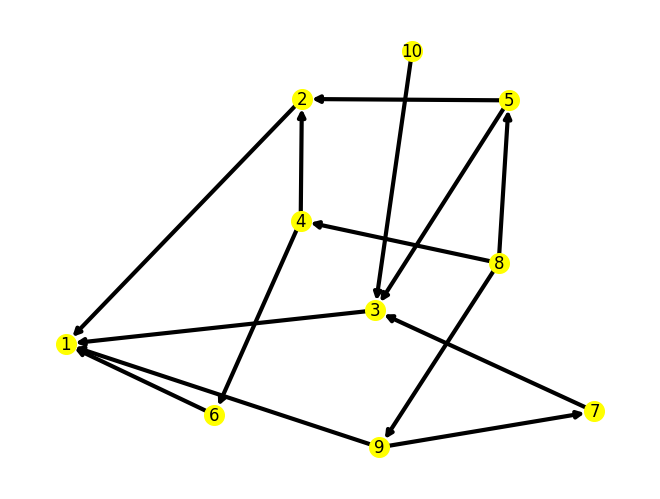

In [10]:

W, max_score, min_score, tiempo_ejecucion, num_connections, num_nodes, max_index, min_index = analizarGrafo('dag.txt', 0.5)
print('Score máximo:', max_score)
print('Score mínimo:', min_score)
print('Tiempo de ejecución:', tiempo_ejecucion, "segundos")
print('Cantidad de conexiones:', num_connections)
print('Cantidad de nodos:', num_nodes)
print('Nodo con mayor score:', max_index)
print('Nodo con menor score:', min_index)

dibujarGrafo(W, print_ejes=False)

print(calcularRanking(W, 0.5))


## Análisis:

Dado que la primer página no tiene una anterior a ella, es la única que no tiene links salientes y por lo tanto es la que más probabilidades va a tener siempre de tener mayor ranking. De hecho probablemente aunque otra página tenga más links entrantes que la primera, si o si deberá apuntar directa o indirectamente a ella, por lo que es realmente difícil que otra página tenga mayor ranking.

Luego se ve como, aunque con cierto grado de variabilidad, cada nueva tanda histórica de transacciones baja su ranking. Esto tiene sentido ya que estamos evaluando a las transacciones por un peso histórico, así como uno no existiría sin sus projenitores, cada transacción no podría iniciarse sin antes validar a una anterior.

- Otra idea puede ser direccionar cada página en la dirección contraria, en ese caso los resultados se invertirán y podremos entender a las transacciones más nuevas como las más relevantes, tal vez porque son las que más información histórica pueden observar.

---

## Enunciado

Sobre los casos de test que se encuentran en el folder `tests`, se pide realizar los análisis siguientes para todos los grafos del folder.

### Análisis Cuantitativo

Para el análisis cuantitativo, se pide, como mínimo, estudiar los tiempos de procesamiento en función del tamaño del grafo de páginas y de la densidad del mismo. Para esto, se espera que presenten gráficos mostrando los tiempos de ejecución para obtener la solución en función de la cantidad de nodos/links de diferentes grafos de páginas aleatorios.


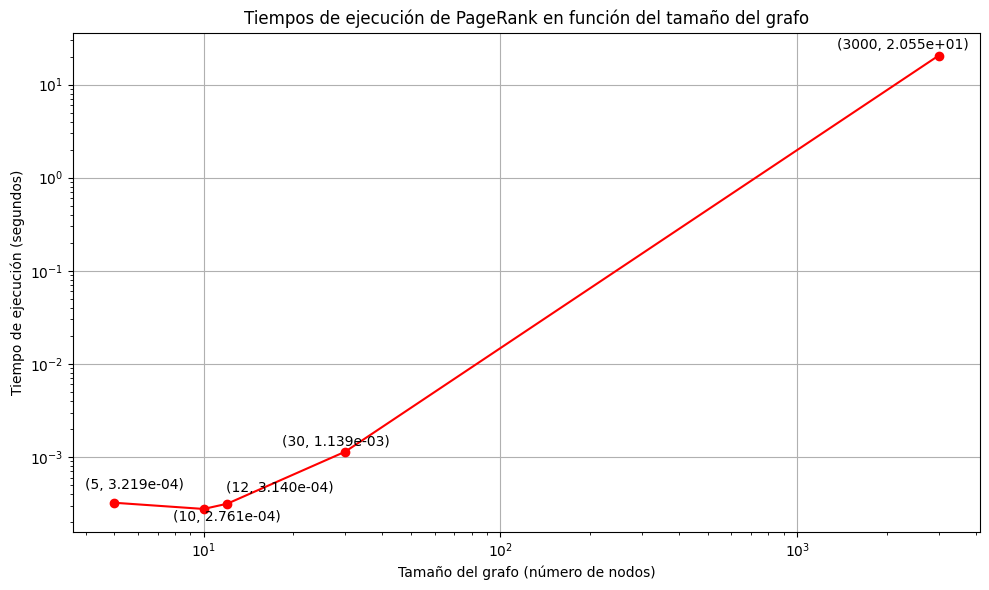

In [1]:
import matplotlib.pyplot as plt
import time 
from funciones import *
from adjustText import adjust_text

def medir_tiempo_ejecucion(W, p):
    start_time = time.time()
    calcularRanking(W, p)
    end_time = time.time()
    return end_time - start_time

    
# pongo todos los grafos juntos 
archivos_grafos = ['./tests/test_aleatorio.txt','./tests/mathworld_grafo.txt' , './tests/test_dosestrellas.txt', './tests/instagram_famosos_grafo.txt', './tests/test_30_segundos.txt']  # Reemplaza con los nombres de tus archivos de grafo
parametro_p = 0.85 

# me armo lista svacias para pondes despues lo datos que me genere y asi poder graficarlos 
tiempos_ejecucion = []
tamanos_grafos = []

for archivo_grafo in archivos_grafos:
    
    W = leer_archivo(archivo_grafo)
    
    tiempo = medir_tiempo_ejecucion(W, parametro_p)
    
    tiempos_ejecucion.append(tiempo)
    tamanos_grafos.append(W.shape[0]) 

plt.figure(figsize=(10, 6))
plt.loglog(tamanos_grafos, tiempos_ejecucion, marker='o', linestyle='-', color='red')
plt.title('Tiempos de ejecución de PageRank en función del tamaño del grafo')
plt.xlabel('Tamaño del grafo (número de nodos)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.grid(True)


# Add labels to each point with scientific notation
texts = []
for i, (x, y) in enumerate(zip(tamanos_grafos, tiempos_ejecucion)):
    texts.append(plt.text(x, y, f'({x}, {y:.3e})', ha='center', va='bottom'))

# Adjust text labels to avoid overlap
adjust_text(texts)

plt.tight_layout()
plt.show()

Estudiamos los tiempos de ejecución para los casos de test dados, observamos que el gráfico se asemeja al de una función cúbica en base a la cantidad de nodos. Esto se debe justamente a que la complejidad del algoritmo es aproximadamente $O(\frac 2 3 n^{3})$ con $n$ el número de nodos.

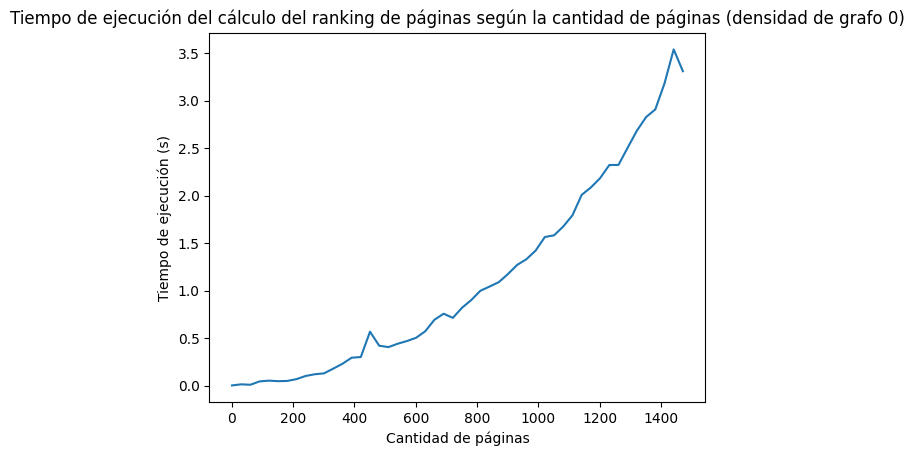

<Figure size 640x480 with 0 Axes>

In [20]:
def graficoCantidadNodos(cant_iteraciones, paso):

    p = 0.1

    tiempos_ejecucion = np.zeros(cant_iteraciones)
    cant_nodos = np.arange(1, cant_iteraciones*paso, paso)

    for i in range(1, cant_iteraciones*paso, paso):
        # Creo una matriz de conectividad de tamaño ixi sin conexiones (todos ceros)
        W = np.zeros((i,i)) 
        # Guardo el tiempo de ejecución para calcular el ranking
        tiempos_ejecucion[i//paso] = tiempo_ejecucion(W,p)


    plt.title("Tiempo de ejecución del cálculo del ranking de páginas según la cantidad de páginas (densidad de grafo 0)")
    plt.xlabel("Cantidad de páginas")
    plt.ylabel("Tiempo de ejecución (s)")
    plt.plot(cant_nodos, tiempos_ejecucion)
    plt.show()
    plt.tight_layout()

# Podemos variar los valores de cant_iteraciones y paso
graficoCantidadNodos(50, 30)

Estudiamos los tiempos de ejecución para los casos de test dados, observamos que el gráfico se asemeja al de una función cúbica en base a la cantidad de nodos. Esto se debe justamente a que la complejidad de nuestro algoritmo es aproximadamente $O(\frac 2 3 n^{3})$ con $n$ el número de nodos. 

Según esta deducción, el tiempo de ejecución no depende de la cantidad de links en el sistema. Veámoslo:

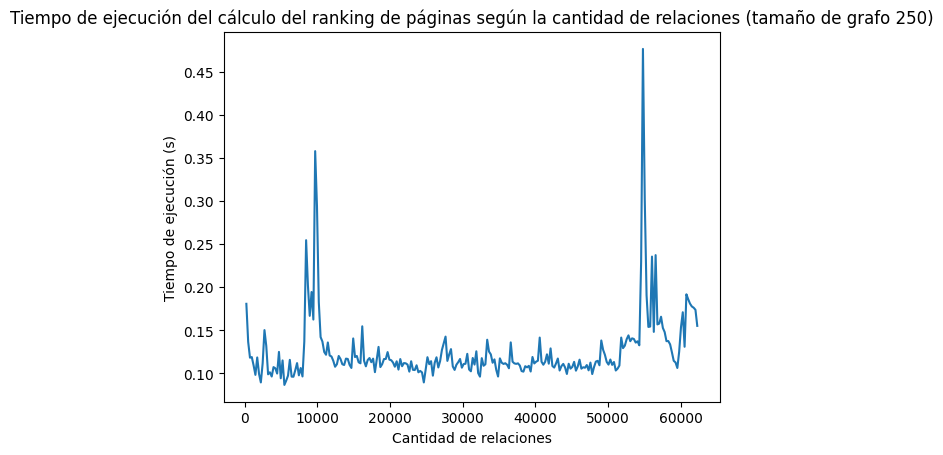

In [32]:
def graficoCantRelaciones(tamano_grafo):
    # Parámetro de probabilidad de salto
    p = 0.01
    
    # Arreglos para almacenar la cantidad de relaciones y los tiempos de ejecución
    cant_relaciones = np.zeros(tamano_grafo)
    tiempos_ejecucion = np.zeros(tamano_grafo)

    # Matriz de adyacencia del grafo
    W = np.zeros((tamano_grafo, tamano_grafo))
    count = 0
    # Generar el grafo con la cantidad de relaciones correspondiente a cada nodo
    for i in range(0, tamano_grafo):
        for j in range(0, tamano_grafo):
            if j != i:
                W[j, i] = 1
                count += 1
        cant_relaciones[i] = count
        tiempos_ejecucion[i] = tiempo_ejecucion(W, p)

    # Graficar la cantidad de relaciones vs. los tiempos de ejecución
    plt.title(f"Tiempo de ejecución del cálculo del ranking de páginas según la cantidad de relaciones (tamaño de grafo {tamano_grafo})")
    plt.xlabel("Cantidad de relaciones")
    plt.ylabel("Tiempo de ejecución (s)")
    plt.plot(cant_relaciones, tiempos_ejecucion)
    plt.show()

graficoCantRelaciones(250)


A pesar de encontrar varios puntos fuera de lo esperado (atribuimos estos resultados a errores de cálculo númericos), podemos observar que el tiempo de ejecución es constante para cantidad de nodos constante. Esto tiene sentido, ya que nuestro algoritmo no tiene caminos distintos para valores distintos, y sin importar los valores, hará el mismo proceso.

### Análisis Cualitativo

Para el análisis cualitativo se deberán estudiar los rankings obtenidos, en función de la estructura del grafo, y del valor de $p$. Para esto, se espera que presenten gráficos mostrando las probabilidades de las páginas mejor rankeadas en función del valor de $p$. 


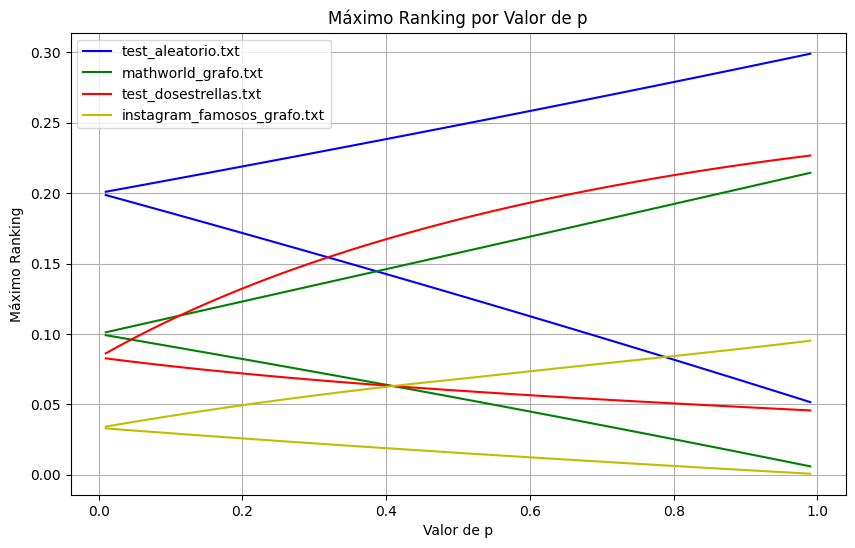

In [24]:
import numpy as np
import matplotlib.pyplot as plt

max_rankings = []
min_rankings = []

def graficar_max_ranking_por_p(W, nombre_grafo, color, num_puntos=50):
    valores_p = np.linspace(0.01, 0.99, num_puntos)
    
    max_rankings = [obtenerMaximoRankingScore(W, p) for p in valores_p]

    min_rankings = [obtenerMinimoRankingScore(W, p) for p in valores_p]

    """for p in valores_p:
        rnk, scr = calcularRanking(W, p)
        max_score = -np.inf
        min_score = np.inf
        # calculo el score máximo
        max_score = np.max(scr)
        # calculo el score mínimo
        min_score = np.min(scr)
        max_rankings.append(max_score)
        min_rankings.append(min_score)"""

    plt.plot(valores_p, max_rankings, label=nombre_grafo, color=color)
    plt.plot(valores_p, min_rankings, color=color)

# Lista de archivos de grafos
archivos_grafos = ['tests/test_aleatorio.txt',
                   'tests/mathworld_grafo.txt',
                   'tests/test_dosestrellas.txt',
                   'tests/instagram_famosos_grafo.txt',
                   ]

# Configuración de colores
colores = ['b', 'g', 'r', 'y']

# Creamos el gráfico
plt.figure(figsize=(10, 6))

# Iteramos sobre los archivos de grafos y generamos las líneas en el gráfico
for i, archivo_grafo in enumerate(archivos_grafos):
    nombre_grafo = archivo_grafo.split('/')[-1]  # Obtenemos el nombre del archivo
    W = leer_archivo(archivo_grafo)
    graficar_max_ranking_por_p(W, nombre_grafo, colores[i % len(colores)])

plt.xlabel('Valor de p')
plt.ylabel('Máximo Ranking')
plt.title('Máximo Ranking por Valor de p')
plt.grid(True)
plt.legend()
plt.show()


**Observación**: Para cada grafo, mostramos el ranking máximo y mínimo obtenidos para cada valor de $p$. 
Podemos observar que cuando $p$ se acerca a 0, todos los valores apuntan al mismo valor, justamente a $1/n$.
También, conforme nos acercamos a 1, la distancia entre el máximo y el mínimo aumenta, el máximo es ascendente y el mínimo descendente.

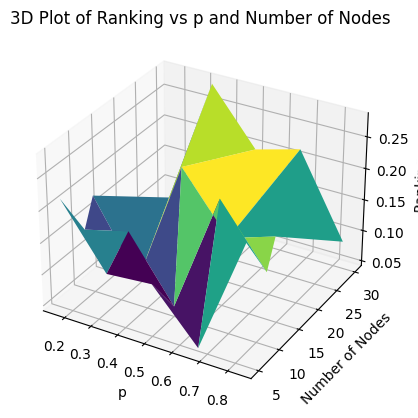

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

archivos_grafos = ['./tests/test_aleatorio.txt','./tests/mathworld_grafo.txt' , './tests/test_dosestrellas.txt', './tests/instagram_famosos_grafo.txt', './tests/test_30_segundos.txt']  # Reemplaza con los nombres de tus archivos de grafo

# Define function to read graph files and calculate ranking
def f(p_values, tamanos_grafos):
    results = []  # List to store results for each combination
    for p in p_values:
        for tamano in tamanos_grafos:
            index = tamanos_grafos.index(tamano)  # Get the index for the current tamano
            W = leer_archivo(archivos_grafos[index])  # Read the matrix for this index
            _, result = calcularRanking(W, p)  # Calculate the result
            results.append(result.max())  # Append the maximum ranking to the list
    return results

# Define values for parameter p
p = np.linspace(0, 1, 7)[1:6]

# Define list of graph files
archivos_grafos = ['./tests/test_aleatorio.txt', './tests/mathworld_grafo.txt', './tests/test_dosestrellas.txt', './tests/instagram_famosos_grafo.txt']

# Define parameter p
parametro_p = 0.85

# Get sizes of graphs
tamanos_grafos = [leer_archivo(archivo_grafo).shape[0] for archivo_grafo in archivos_grafos]

# Calculate rankings
X = f(p, tamanos_grafos)

# Create meshgrid for plotting
P, T = np.meshgrid(p, tamanos_grafos)

# Plot the 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(P, T, np.array(X).reshape(P.shape), cmap='viridis')

# Set labels and title
ax.set_xlabel('p')
ax.set_ylabel('Number of Nodes')
ax.set_zlabel('Ranking')
ax.set_title('3D Plot of Ranking vs p and Number of Nodes')

plt.show()


Por si no quedó claro, este último gráfico termina de aclarar cualquier duda que cualquiera pueda tener ;)

### Dos estrellas

Para el caso **test_dosestrellas.txt** se pregunta: 

¿Cuál es la mínima cantidad de links que se deben agregar para que la pagina correspondiente al nodo 1 quede primera en el ranking? ¿ Cómo se modificó la conectividad? Analizar.



**Solución:** 
Fueron agregados los links:
- 7 1
- 11 1
- 2 1
- 3 1

La estrategia utilizada fue aumentar el ranking de 1 enviándole cada vez un link proveniente del nodo con mayor ranking (que previamente no lo tenga). Esa es la manera más eficiente de aumentar el ranking del nodo, ya que en eso se basa el algoritmo. En cada iteración, el ranking de 1 fue aumentando hasta superarar el de todos.

Intentamos también a agregar links salientes del mayor rankeado para disminuir su ranking y así no tener que aumentar tanto el del 1, pero se necesitaron más links para lograr el objetivo.

Score máximo: 0.21949233098920715
Score mínimo: 0.04103622286848965
Tiempo de ejecución: 0.0007793903350830078 segundos
Cantidad de conexiones: 26.0
Cantidad de nodos: 12
Nodo con mayor score: 1
Nodo con menor score: 2
Links agregados: 4.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([0.21949233, 0.04103622, 0.04103622, 0.04103622, 0.04103622,
        0.18787328, 0.18919499, 0.07419798, 0.04127413, 0.04127413,
        0.04127413, 0.04127413]))

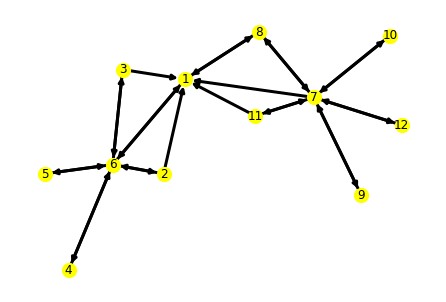

In [30]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas_top1.txt'
    
#ANALIZAR GRAFO
W, max_score, min_score, tiempo_ejecucion, num_connections, num_nodes, max_index, min_index = analizarGrafo(archivo_test, 0.9)
print('Score máximo:', max_score)
print('Score mínimo:', min_score)
print('Tiempo de ejecución:', tiempo_ejecucion, "segundos")
print('Cantidad de conexiones:', num_connections)
print('Cantidad de nodos:', num_nodes)
print('Nodo con mayor score:', max_index)
print('Nodo con menor score:', min_index)
print('Links agregados:', num_connections - 22)

dibujarGrafo(W, print_ejes=False)

calcularRanking(W, 0.9)
